In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split

C:\Users\Kenneth\Miniconda3\envs\clearbrain_lastresort\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


# Data 9

In [2]:
# Read in 
df9 = pd.read_csv('../data/df9.csv')

In [3]:
# Inspect
df9.head()

x1        x2        x3        x4        x5        x6  x7  x8    x9  \
0 -1.912877 -0.509738  1.935923 -2.119992  0.474137  3.647543  A2  B2  C133   
1 -0.341252  0.341502  2.268666 -0.948835 -0.492523  4.159113  A1  B4  C130   
2  0.658157 -0.347933  3.104409  0.236928  0.359240  6.498557  A1  B4   C18   
3  2.288540 -1.028834  3.554489 -0.215137 -0.436760  7.154874  A2  B1   C45   
4  0.618358 -1.526877  3.857197 -0.343902  0.098206  7.857794  A2  B2   C49   

  x10          y  
0  D3 -23.858957  
1  D2  -5.204424  
2  D2  11.359090  
3  D3 -29.550723  
4  D3 -13.033020

In [4]:
df9.tail()

x1        x2        x3        x4        x5        x6  x7  x8    x9  \
995 -0.377935 -0.810448  3.658649  0.614948 -1.292935  7.227878  A1  B1   C52   
996  0.968435  1.273159  3.449217 -0.073787  1.088958  6.701653  A1  B4  C168   
997  0.919181 -1.518937  3.427333  1.152154  0.039267  6.797440  A2  B1   C91   
998  0.248702 -0.184816  2.923806  1.188720 -0.361918  6.040283  A2  B5   C47   
999  0.937344 -1.455486  4.277617 -0.350077  1.197847  8.533164  A1  B1  C151   

    x10          y  
995  D3   9.729703  
996  D2  10.337900  
997  D3 -13.781643  
998  D2 -10.494192  
999  D3  -8.665508

### First, summarize each variable

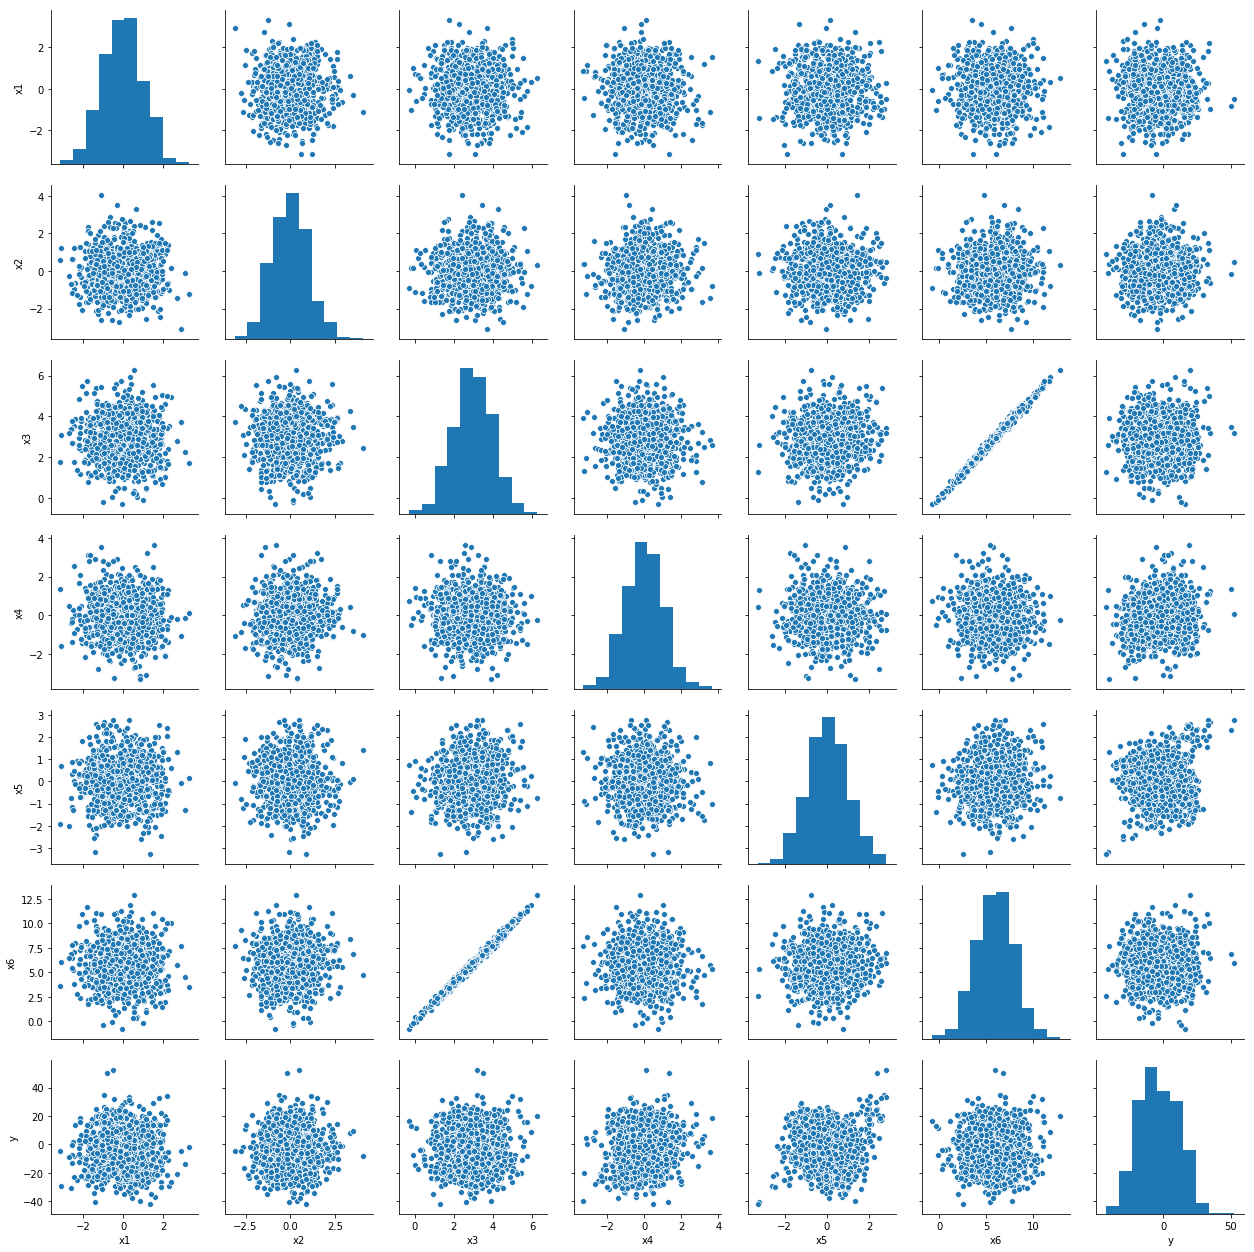

In [5]:
# Numerics
sb.pairplot(df9)

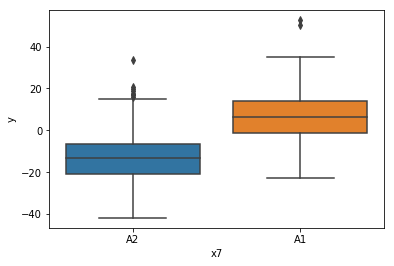

In [6]:
# x7
sb.boxplot(data=df9, x='x7', y='y')

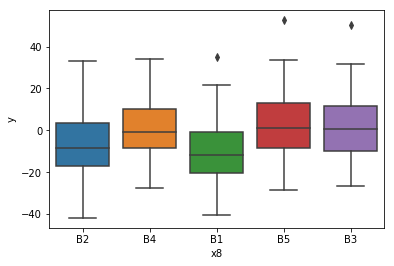

In [7]:
# x8
sb.boxplot(data=df9, x='x8', y='y')

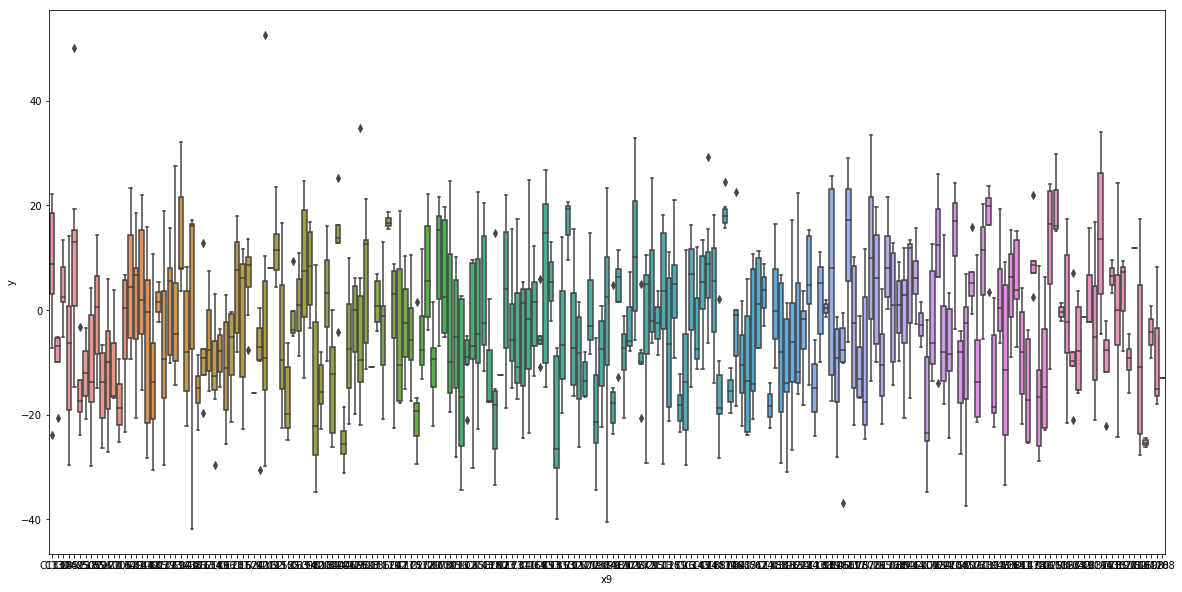

In [8]:
# x9
plt.figure(figsize=(20, 10))
sb.boxplot(data=df9, x='x9', y='y')

In [9]:
# Value counts for x9
df9['x9'].value_counts()

C171    12
C21     11
C43     10
C94     10
C45      9
        ..
C182     1
C92      1
C108     1
C74      1
C162     1
Name: x9, Length: 199, dtype: int64

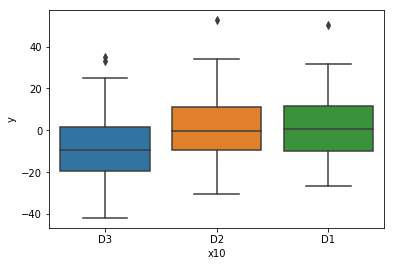

In [10]:
# x10
sb.boxplot(data=df9, x='x10', y='y')

In [11]:
# Any null
df9.isnull().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
y      0
dtype: int64

Notes:

- Some variability across all variables.
- Numerics:
    - None seem to obviously have a relationship with y
    - x3 and x6 seem highly correlated
    - x5 seems to have a different distribution than the others because it's outliers don't seem as randomly distributed as the others
- Categoricals:
    - x7/x8/x10 all seem to have some relationship with y
    - x9 has very high cardinality (i.e. a lot of values, 199, relative to the number of rows, 1k), which means we'll need to be a little careful in modelling it.  It seems at least somewhat related to y, but hard to tell with such a low sample size.
- No missing values (at least as far as we can tell so far)

### Let's fit a quick kitchen sink model to start, leaving out x9 for now

In [12]:
# Fit model
model9 = smf.ols(
    formula='y ~ x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x10',
    data=df9
)
model9_fit = model9.fit()

In [13]:
# Summarize
model9_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     90.47
Date:                Tue, 02 Jun 2020   Prob (F-statistic):          6.36e-158
Time:                        21:21:31   Log-Likelihood:                -3707.7
No. Observations:                1000   AIC:                             7443.
Df Residuals:                     986   BIC:                             7512.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.0044      4.187     -1.912      0.056     -16.222       0.213
x7[T.A2]     -18.3927      0.630    -29.183      0.000     -19.629     -17.156
x8[T.B2]       1.6045      1.007      1.594      0.111      -0.371       3.580
x8[T.B3]      17.5711      3.982      4.413      0.000       9.758      25.385
x8[T.B4]      10.1855      2.298      4.433      0.000       5.676      14.695
x8[T.B5]      10.5223      2.272      4.630      0.000       6.063      14.982
x10[T.D2]      6.9079      3.397      2.033      0.042       0.241      13.574
x10[T.D3]      7.3054      4.056      1.801      0.072      -0.654      15.265
x1            -0.7174      0.313     -2.291      0.022      -1.332      -0.103
x2             0.2764      0.310      0.891      0.373      -0.332       0.885
x3             2.8068      3.131      0.896      0.370      -3.338       8.951
x4             2.0491      0.305      6.714      0.000       1.450       2.648
x5             0.5259      0.325      1.619      0.106      -0.112       1.163
x6            -1.3770      1.553     -0.887      0.375      -4.424       1.670
==============================================================================
Omnibus:                       39.949   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.308
Skew:                           0.419   Prob(JB):                     1.96e-11
Kurtosis:                       3.693   Cond. No.                         174.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notes:

- Most categorical values seem to have strong effects, especially x7 and x8
- Most numericals, however, don't seem to.  However, keep in mind these are just simple lines we're fitting so far.

Let's look at some plots to assess to the model

In [14]:
def plot_univariate(df, x, y, model_fit, n_bins=5):
    # Add prediction
    df = df.assign(p = model_fit.predict(df))
    
    # If x is numeric, bin into 5 groups
    if df[x].dtype in (np.int64, np.float64):
        df[x] = pd.cut(df[x], n_bins).apply(str)
    
    # Aggregate
    df_agg = (
        df
        .groupby(x)
        .agg(
            n=(y, 'count'),
            y_mean=(y, 'mean'),
            p_mean=('p', 'mean'),
        )
        .reset_index()
    )
    
    print(df_agg)
    
    # Plot
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(20, 10))
    
    # First plot: Counts
    ax1.bar(x, 'n', data=df_agg)
    
    # Second plot: Average actuals and predicted
    ax2.scatter(x, 'y_mean', data=df_agg, label='Actual', marker='.', color='green', linewidth=3)
    ax2.scatter(x, 'p_mean', data=df_agg, label='Predicted', marker='.', color='red', linewidth=3)
    
    plt.legend()
    plt.show()

                 x1    n    y_mean    p_mean
0  (-3.156, -1.867]   32 -7.714511 -4.212820
1  (-1.867, -0.584]  268 -1.601000 -2.087843
2   (-0.584, 0.699]  472 -3.561293 -3.709397
3    (0.699, 1.982]  213 -3.598290 -2.966536
4    (1.982, 3.265]   15 -4.379912 -7.462484


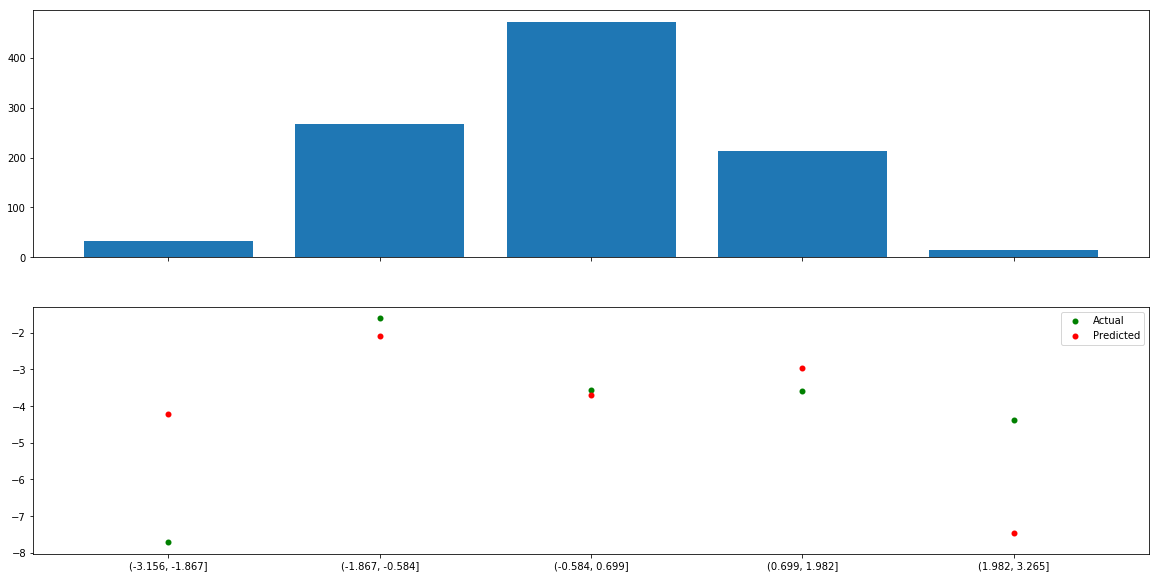

In [15]:
# x1
plot_univariate(df9, 'x1', 'y', model9_fit, n_bins=5)

Not doing well on the edges, but could be due to low sample sizes.

                 x2    n    y_mean    p_mean
0  (-3.114, -1.681]   39 -7.131200 -5.056299
1  (-1.681, -0.254]  370 -3.719661 -3.824770
2   (-0.254, 1.172]  478 -2.575604 -2.949191
3    (1.172, 2.599]  105 -2.692065 -1.728326
4    (2.599, 4.026]    8 -2.599972  1.818897


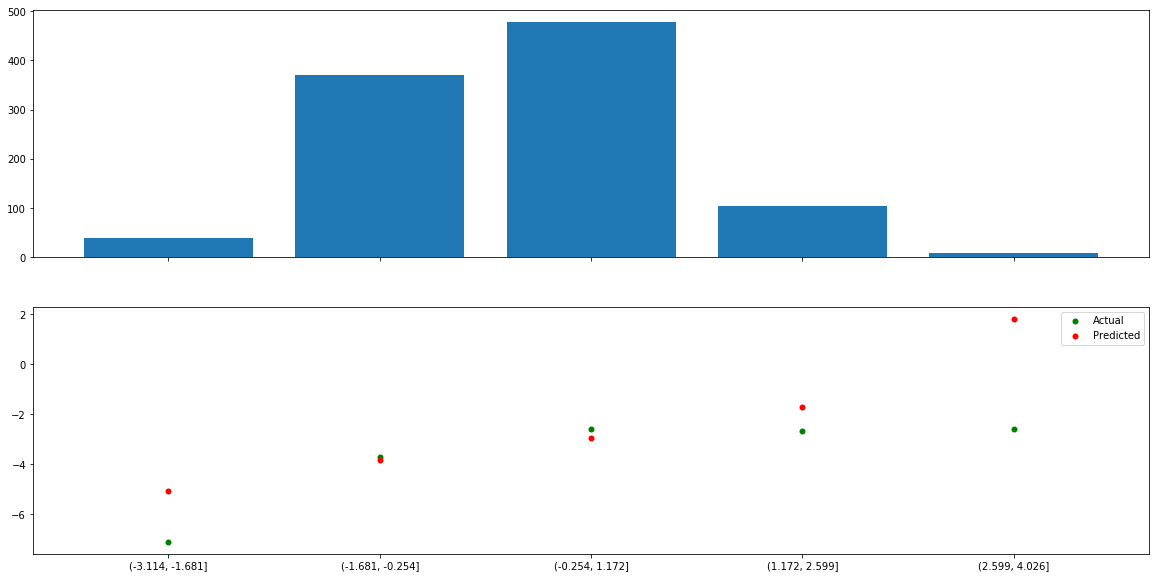

In [16]:
# x2
plot_univariate(df9, 'x2', 'y', model9_fit, n_bins=5)

Also not doing well on the edges, but could be due to low sample sizes.

               x3    n    y_mean    p_mean
0  (-0.298, 1.02]   25 -4.738267 -5.086483
1   (1.02, 2.331]  231 -2.408384 -3.136359
2  (2.331, 3.642]  486 -3.725891 -3.381583
3  (3.642, 4.953]  235 -2.979013 -2.691869
4  (4.953, 6.265]   23 -0.145752 -2.665106


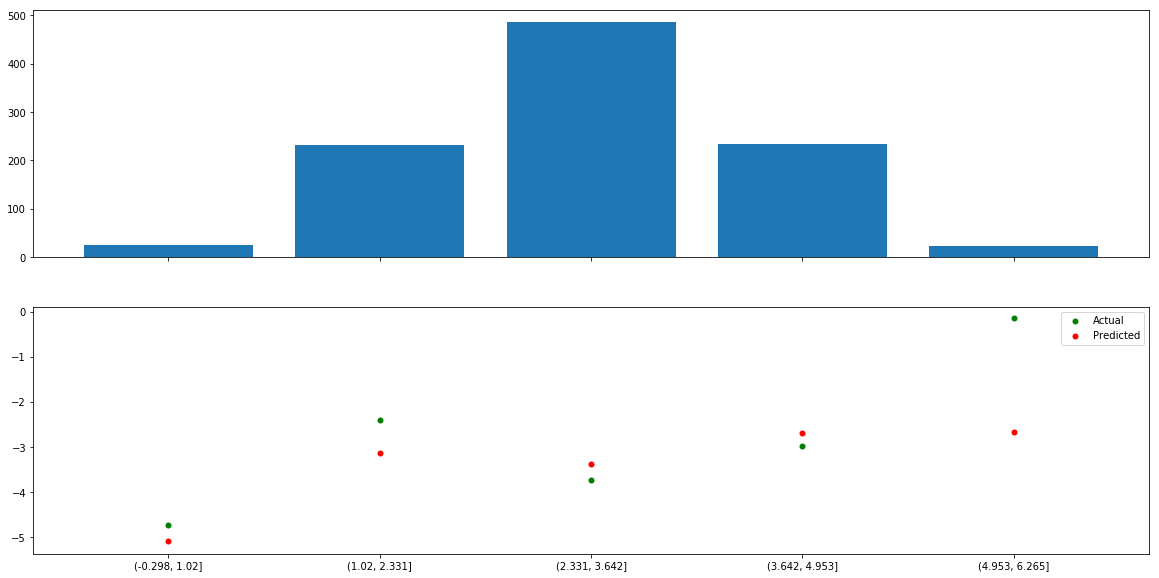

In [17]:
# x3
plot_univariate(df9, 'x3', 'y', model9_fit, n_bins=5)

                 x4    n    y_mean    p_mean
0  (-3.294, -1.904]   30 -6.856164 -7.566013
1  (-1.904, -0.521]  277 -5.570875 -5.285878
2   (-0.521, 0.861]  494 -3.079709 -3.200836
3    (0.861, 2.244]  182 -0.071303  0.090112
4    (2.244, 3.627]   17  5.539651  3.940257


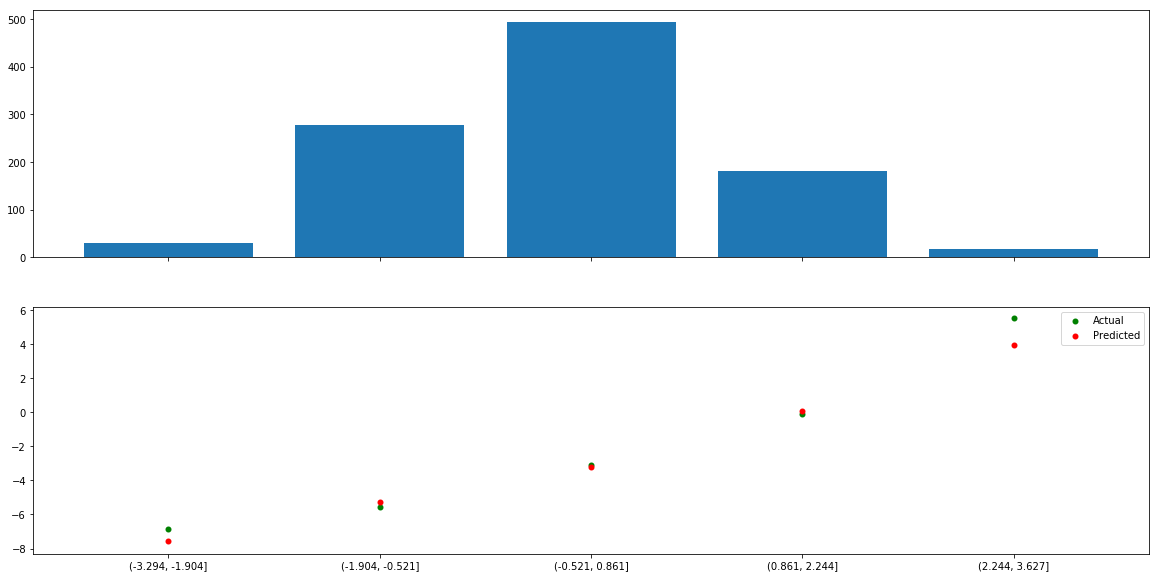

In [18]:
# x4
plot_univariate(df9, 'x4', 'y', model9_fit, n_bins=5)

                 x5    n     y_mean    p_mean
0  (-3.291, -2.071]   11 -18.449389 -7.494820
1  (-2.071, -0.857]  163   0.638131 -3.815911
2   (-0.857, 0.356]  456  -3.345422 -3.067187
3     (0.356, 1.57]  307  -7.012989 -3.015890
4     (1.57, 2.783]   63   9.340178 -2.540397


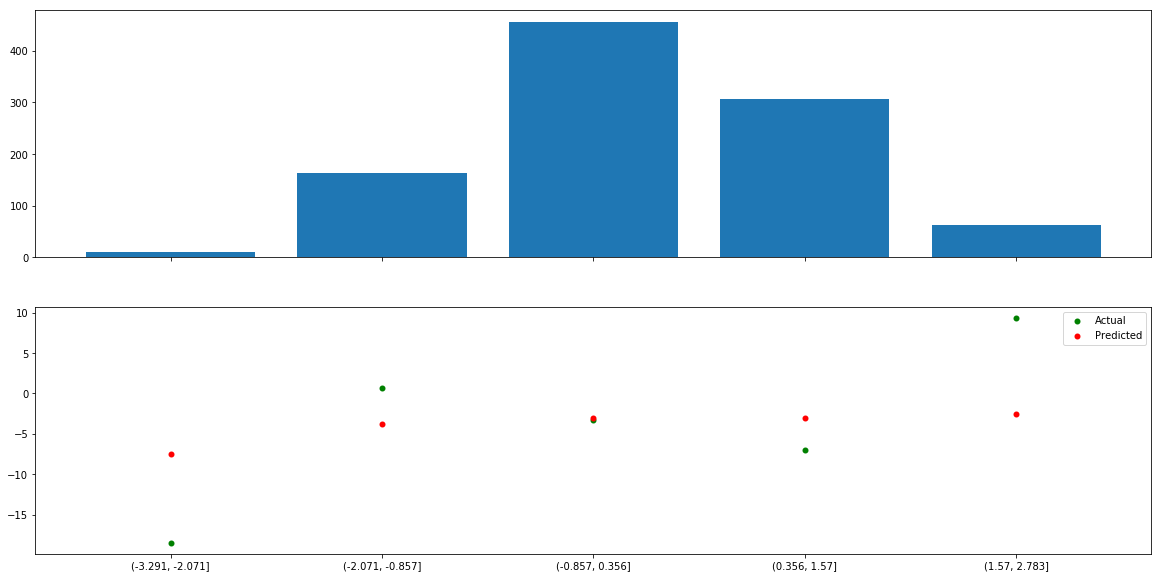

In [19]:
# x5
plot_univariate(df9, 'x5', 'y', model9_fit, n_bins=5)

                 x6    n    y_mean    p_mean
0   (-0.779, 1.968]   24 -3.403954 -4.105959
1    (1.968, 4.701]  250 -2.398761 -3.058936
2    (4.701, 7.434]  494 -3.613328 -3.180823
3   (7.434, 10.168]  213 -3.466913 -3.261831
4  (10.168, 12.901]   19  0.832892 -3.138065


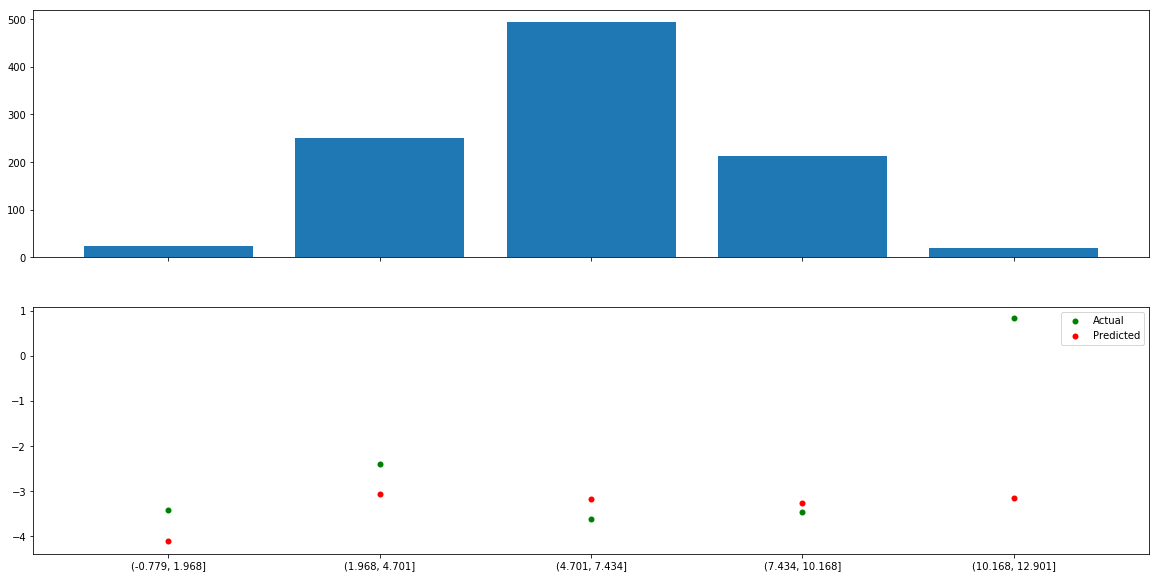

In [20]:
# x6
plot_univariate(df9, 'x6', 'y', model9_fit, n_bins=5)

   x7    n     y_mean     p_mean
0  A1  508   6.059931   6.059931
1  A2  492 -12.738702 -12.738702


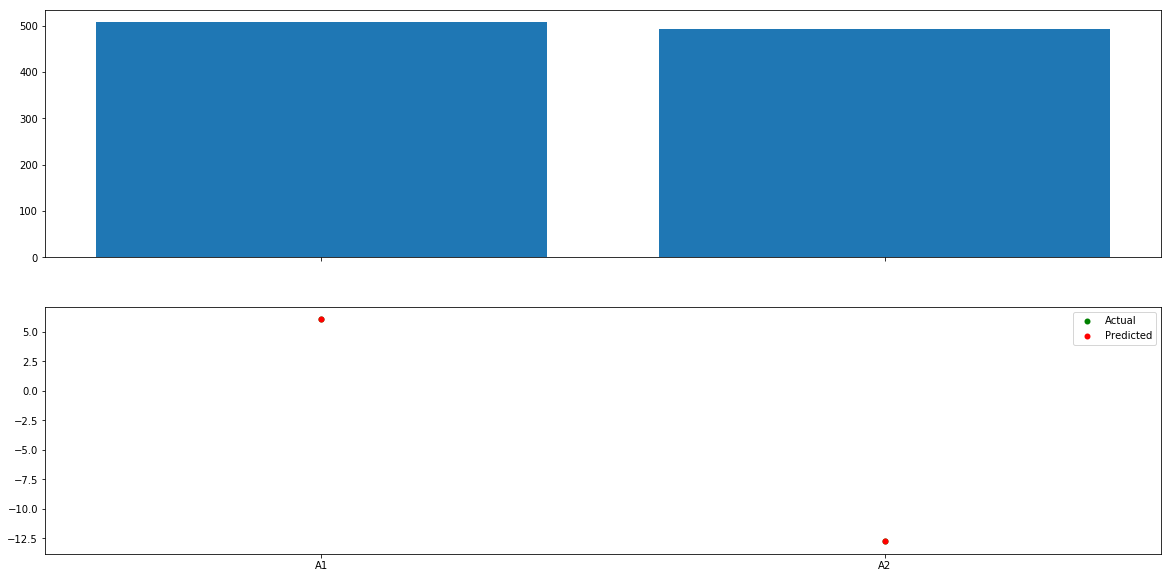

In [21]:
# x7
plot_univariate(df9, 'x7', 'y', model9_fit, n_bins=5)

   x8    n     y_mean     p_mean
0  B1  231 -10.432414 -10.432414
1  B2  170  -7.619846  -7.619846
2  B3  218   0.886464   0.886464
3  B4  170   0.043804   0.043804
4  B5  211   1.495588   1.495588


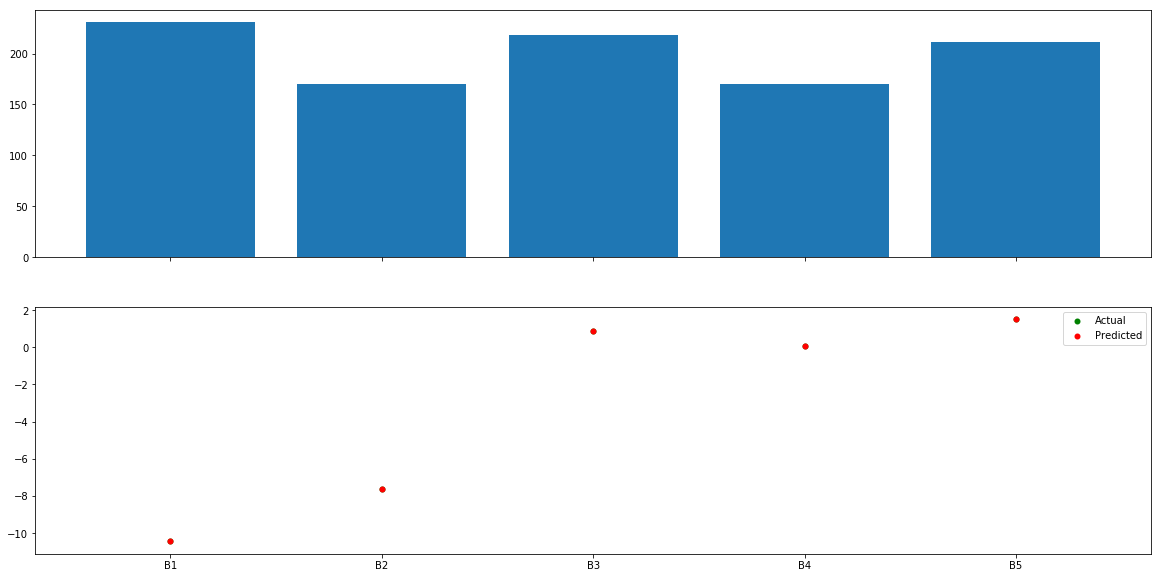

In [22]:
# x8
plot_univariate(df9, 'x8', 'y', model9_fit, n_bins=5)

  x10    n    y_mean    p_mean
0  D1  209  0.542400  0.542400
1  D2  412  0.335178  0.335178
2  D3  379 -9.077709 -9.077709


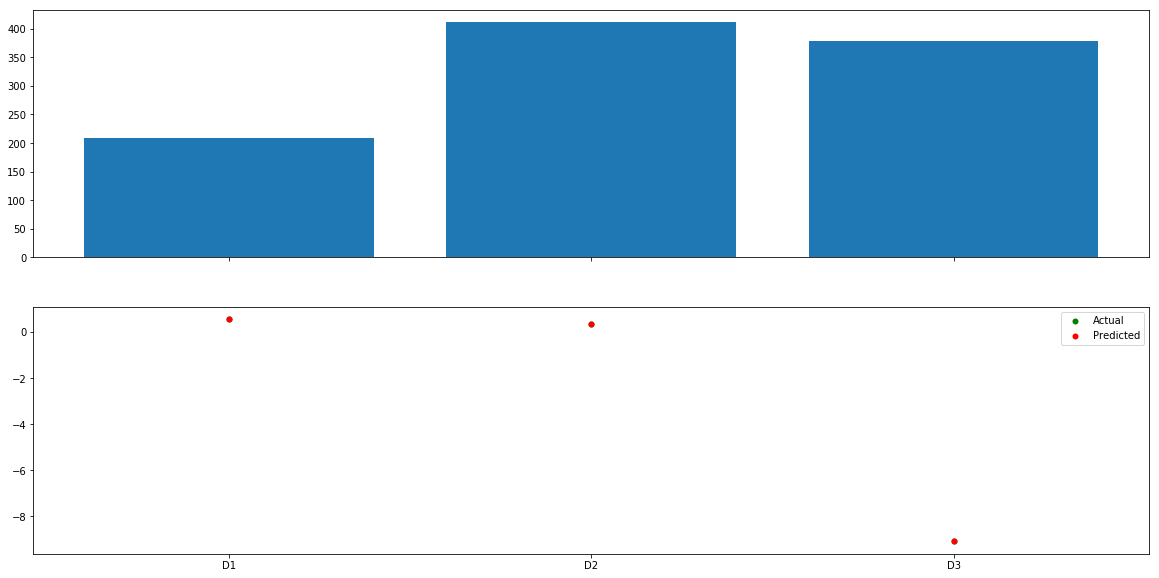

In [23]:
# x10
plot_univariate(df9, 'x10', 'y', model9_fit, n_bins=5)

Notes:

- Numerics
    - x4 is the only one with a seemlingly linear effect
    - Most others vary more in the far left/right values, with:
        - x1 bounces between over and underpredicting (maybe cubic?)
        - x2 overpredicting towards the ends (maybe parabolic?)
        - x3 same as x1
        - x5 same as x1
        - x6 underpredicting on left, overpredicting on right, and underpredicting a lot on far right (maybe cubic?)
- Categoricals
    - Estimated effects seem good
    

### Now, try some stuff to improve the model fit

From here we have a few options to try to include:

- Test some non-linear effects
- See if any of these variables have a notable interaction effect with each other
    - Start with the categorical variables interacting with the numerics, the effects are relatively large and might inform underlying distribution differences
- Try to incorporate x9
    - Eh, not quite yet, let's try some of these other ideas
    
Let's start with some non-linear effects

In [24]:
# Fit model
model9_nonlinear = smf.ols(
    formula='''y ~ x1 + np.power(x1, 2) + np.power(x1, 3) +
                   x2 + np.power(x2, 2) +
                   x3 + np.power(x3, 2) + np.power(x3, 3) +
                   x4 +
                   x5 + np.power(x5, 2) + np.power(x5, 3) +
                   x6 + np.power(x6, 2) + np.power(x6, 3) + 
                   x7 + x8 + x10''',
    data=df9
)
model9_nonlinear_fit = model9_nonlinear.fit()

In [25]:
# Summarize
model9_nonlinear_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     98.88
Date:                Tue, 02 Jun 2020   Prob (F-statistic):          1.75e-230
Time:                        21:21:33   Log-Likelihood:                -3514.5
No. Observations:                1000   AIC:                             7075.
Df Residuals:                     977   BIC:                             7188.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -10.8249      4.067     -2.662      0.008     -18.806      -2.844
x7[T.A2]          -18.2737      0.523    -34.909      0.000     -19.301     -17.246
x8[T.B2]            1.4726      0.839      1.756      0.079      -0.173       3.118
x8[T.B3]           18.1908      3.308      5.499      0.000      11.699      24.683
x8[T.B4]            9.9914      1.913      5.223      0.000       6.237      13.746
x8[T.B5]           10.3265      1.893      5.454      0.000       6.611      14.042
x10[T.D2]           7.8005      2.821      2.765      0.006       2.264      13.337
x10[T.D3]           8.5210      3.373      2.527      0.012       1.903      15.139
x1                 -1.7635      0.425     -4.147      0.000      -2.598      -0.929
np.power(x1, 2)    -0.5467      0.190     -2.878      0.004      -0.919      -0.174
np.power(x1, 3)     0.4001      0.116      3.461      0.001       0.173       0.627
x2                  0.0267      0.261      0.102      0.919      -0.486       0.539
np.power(x2, 2)    -0.3406      0.173     -1.974      0.049      -0.679      -0.002
x3                 30.6365     16.053      1.908      0.057      -0.865      62.138
np.power(x3, 2)   -10.1791      5.652     -1.801      0.072     -21.271       0.913
np.power(x3, 3)     1.0894      0.635      1.715      0.087      -0.157       2.336
x4                  2.1569      0.253      8.520      0.000       1.660       2.654
x5                 -5.6783      0.441    -12.882      0.000      -6.543      -4.813
np.power(x5, 2)     1.9765      0.196     10.085      0.000       1.592       2.361
np.power(x5, 3)     2.0638      0.122     16.937      0.000       1.825       2.303
x6                -13.8082      7.813     -1.767      0.077     -29.140       1.524
np.power(x6, 2)     2.1515      1.363      1.579      0.115      -0.523       4.826
np.power(x6, 3)    -0.1094      0.076     -1.438      0.151      -0.259       0.040
==============================================================================
Omnibus:                       12.588   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                8.951
Skew:                           0.108   Prob(JB):                       0.0114
Kurtosis:                       2.590   Cond. No.                     2.77e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Notes:

- Numerics
    - x4 still has significant linear effect
    - x1 and x5 have significant 2- and 3-power effects
    - x2 has a very slightly significant 2-power effect but not a linear effect
    - We get the "strong multicollinearity" error, probably due to x3 and x6 being so strongly correlated.  Let's drop one arbitrarily in favor of the other (keep x6 because 6 is clearly a better number than 3)
- Categoricals
    - Don't really change from the previous model

Let's reassess the univariates for numerics.

                 x1    n    y_mean    p_mean
0  (-3.156, -1.867]   32 -7.714511 -9.852891
1  (-1.867, -0.584]  268 -1.601000 -1.114250
2   (-0.584, 0.699]  472 -3.561293 -3.447207
3    (0.699, 1.982]  213 -3.598290 -4.147082
4    (1.982, 3.265]   15 -4.379912 -4.311666


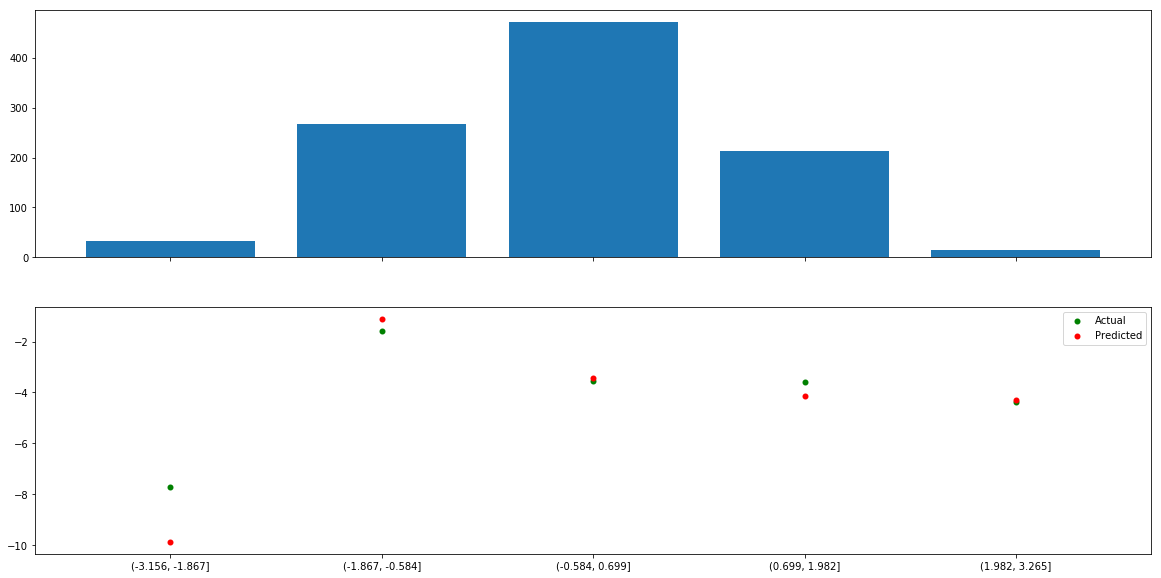

In [26]:
# x1
plot_univariate(df9, 'x1', 'y', model9_nonlinear_fit, n_bins=5)

                 x2    n    y_mean    p_mean
0  (-3.114, -1.681]   39 -7.131200 -6.173610
1  (-1.681, -0.254]  370 -3.719661 -3.865077
2   (-0.254, 1.172]  478 -2.575604 -2.662837
3    (1.172, 2.599]  105 -2.692065 -2.149738
4    (2.599, 4.026]    8 -2.599972 -2.448620


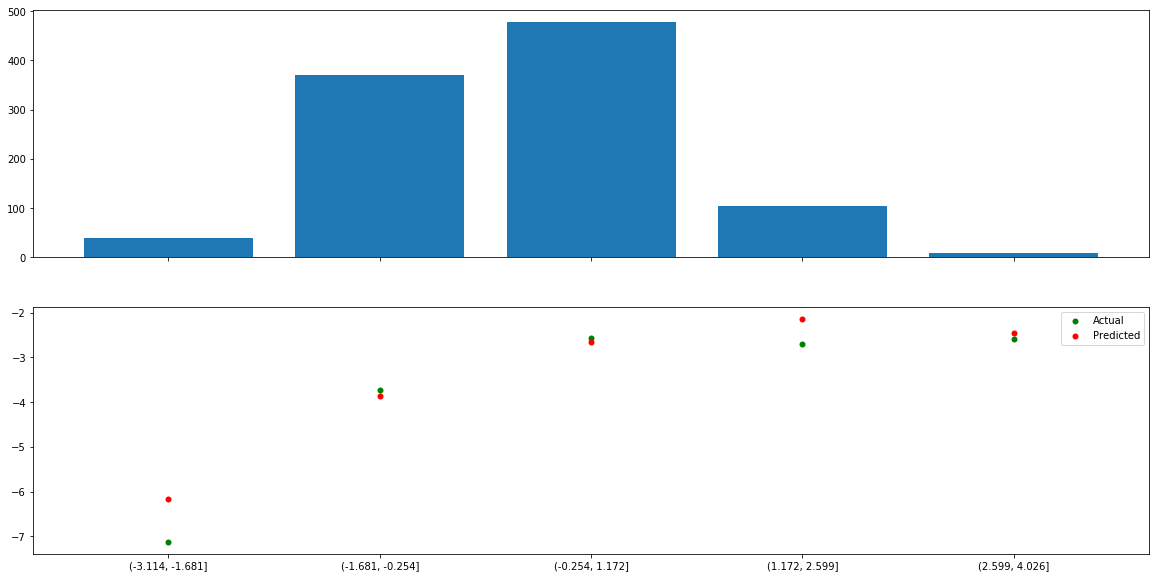

In [27]:
# x2
plot_univariate(df9, 'x2', 'y', model9_nonlinear_fit, n_bins=5)

               x3    n    y_mean    p_mean
0  (-0.298, 1.02]   25 -4.738267 -5.593177
1   (1.02, 2.331]  231 -2.408384 -2.433069
2  (2.331, 3.642]  486 -3.725891 -3.582736
3  (3.642, 4.953]  235 -2.979013 -3.307526
4  (4.953, 6.265]   23 -0.145752  1.363047


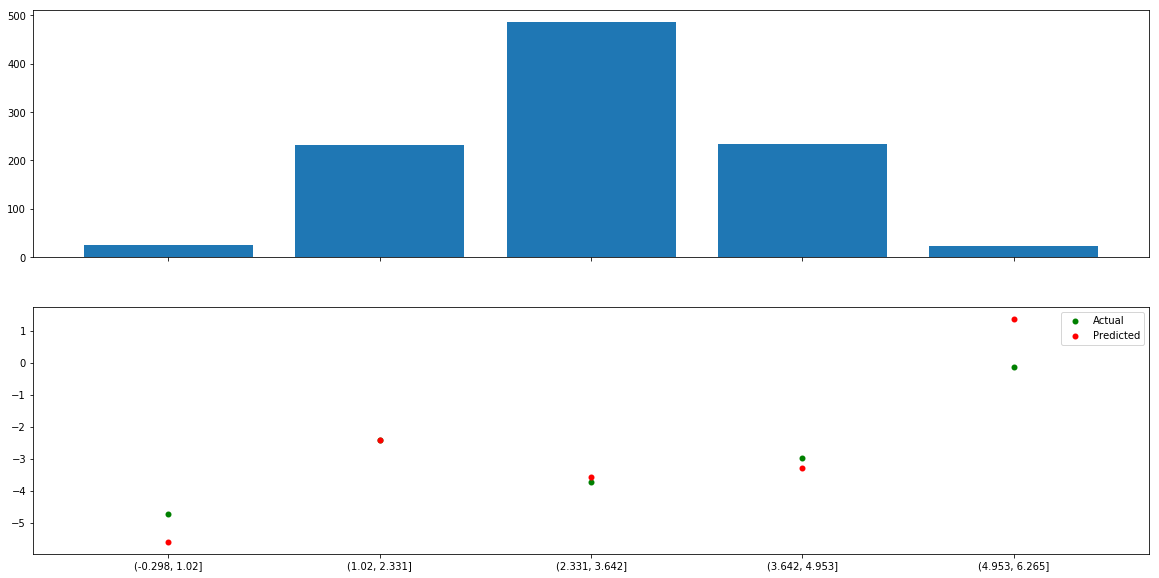

In [28]:
# x3
plot_univariate(df9, 'x3', 'y', model9_nonlinear_fit, n_bins=5)

                 x4    n    y_mean    p_mean
0  (-3.294, -1.904]   30 -6.856164 -6.979538
1  (-1.904, -0.521]  277 -5.570875 -5.181989
2   (-0.521, 0.861]  494 -3.079709 -3.388320
3    (0.861, 2.244]  182 -0.071303  0.218660
4    (2.244, 3.627]   17  5.539651  5.284369


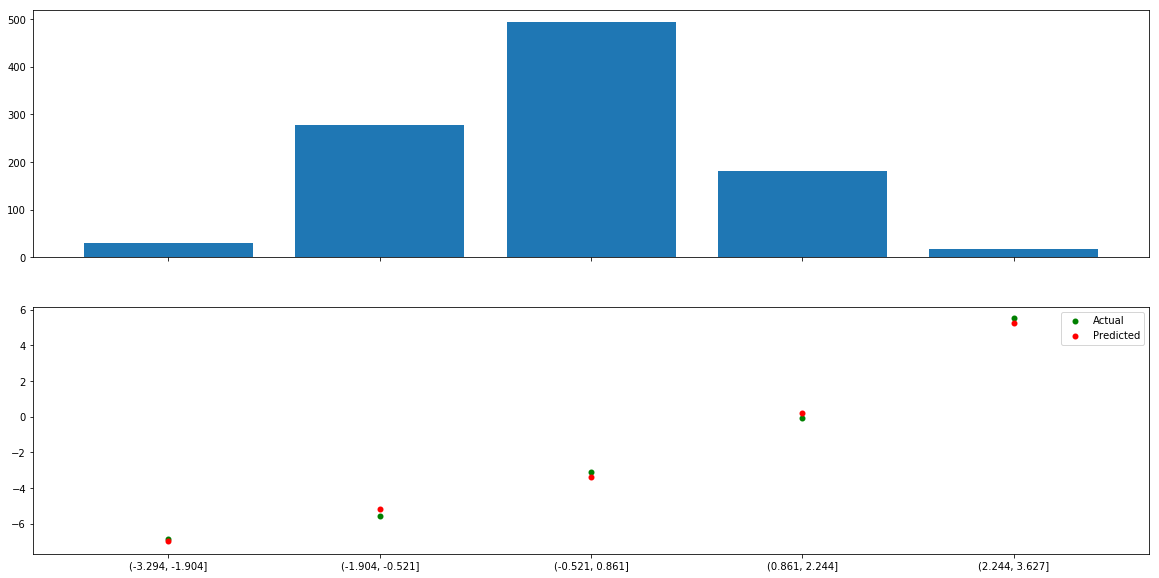

In [29]:
# x4
plot_univariate(df9, 'x4', 'y', model9_nonlinear_fit, n_bins=5)

                 x5    n     y_mean     p_mean
0  (-3.291, -2.071]   11 -18.449389 -16.158192
1  (-2.071, -0.857]  163   0.638131   0.361775
2   (-0.857, 0.356]  456  -3.345422  -3.480179
3     (0.356, 1.57]  307  -7.012989  -6.822946
4     (1.57, 2.783]   63   9.340178   9.704444


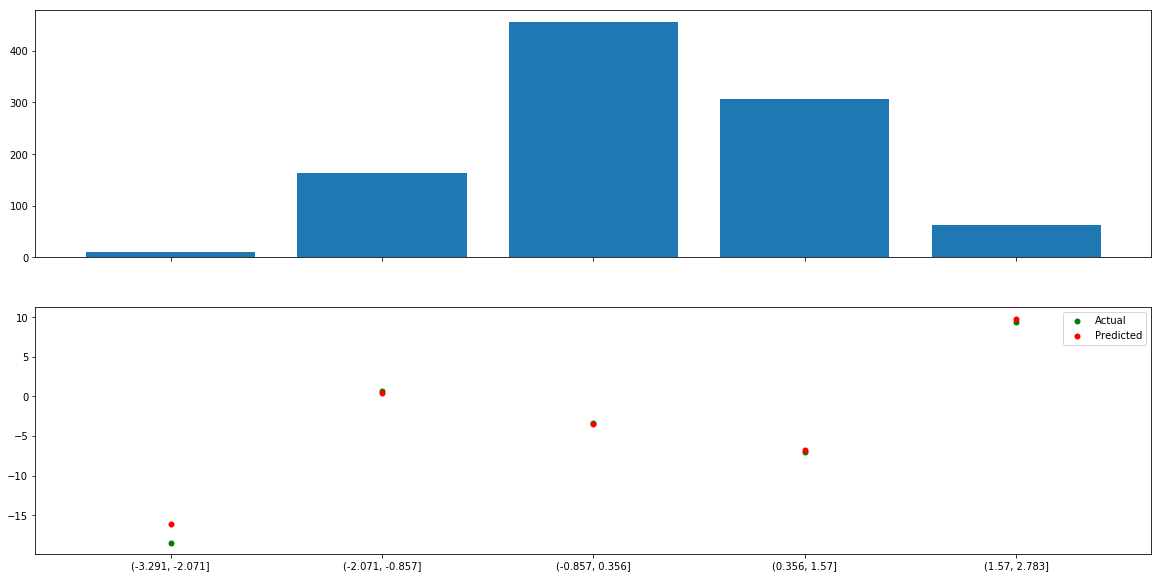

In [30]:
# x5
plot_univariate(df9, 'x5', 'y', model9_nonlinear_fit, n_bins=5)

                 x6    n    y_mean    p_mean
0   (-0.779, 1.968]   24 -3.403954 -4.379485
1    (1.968, 4.701]  250 -2.398761 -2.473723
2    (4.701, 7.434]  494 -3.613328 -3.403695
3   (7.434, 10.168]  213 -3.466913 -3.804593
4  (10.168, 12.901]   19  0.832892  1.386586


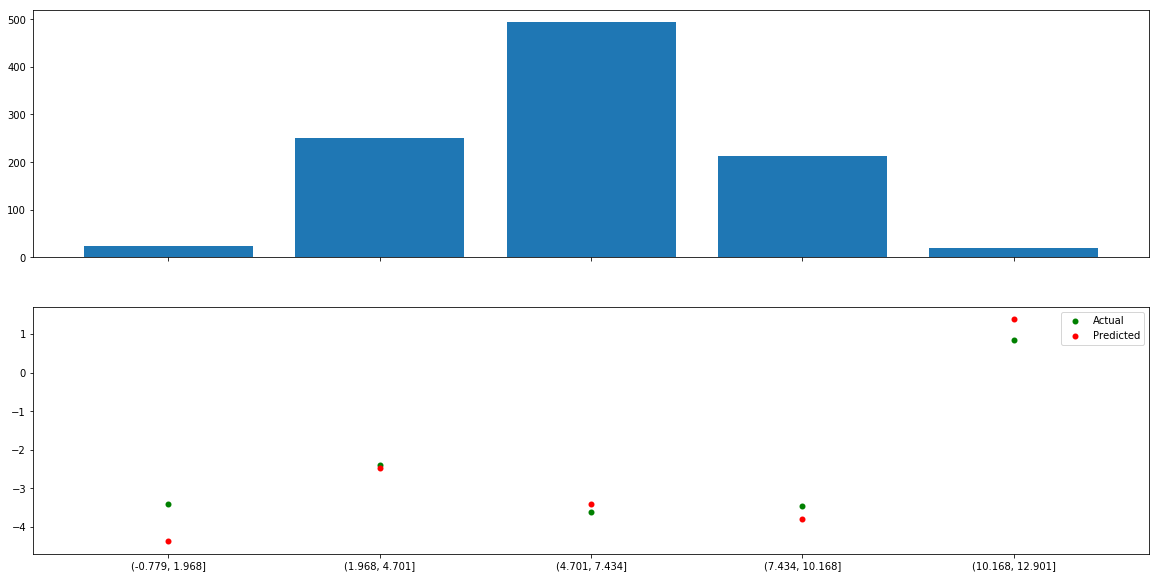

In [31]:
# x6
plot_univariate(df9, 'x6', 'y', model9_nonlinear_fit, n_bins=5)

x1, x2, and x5 do look a bit better, so let's keep the effects for now.

Now let's jump to categorical * numerical effects.  For each categorical, let's do a scatterplot of the numerics colored by the values.

C:\Users\Kenneth\Miniconda3\envs\clearbrain_lastresort\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


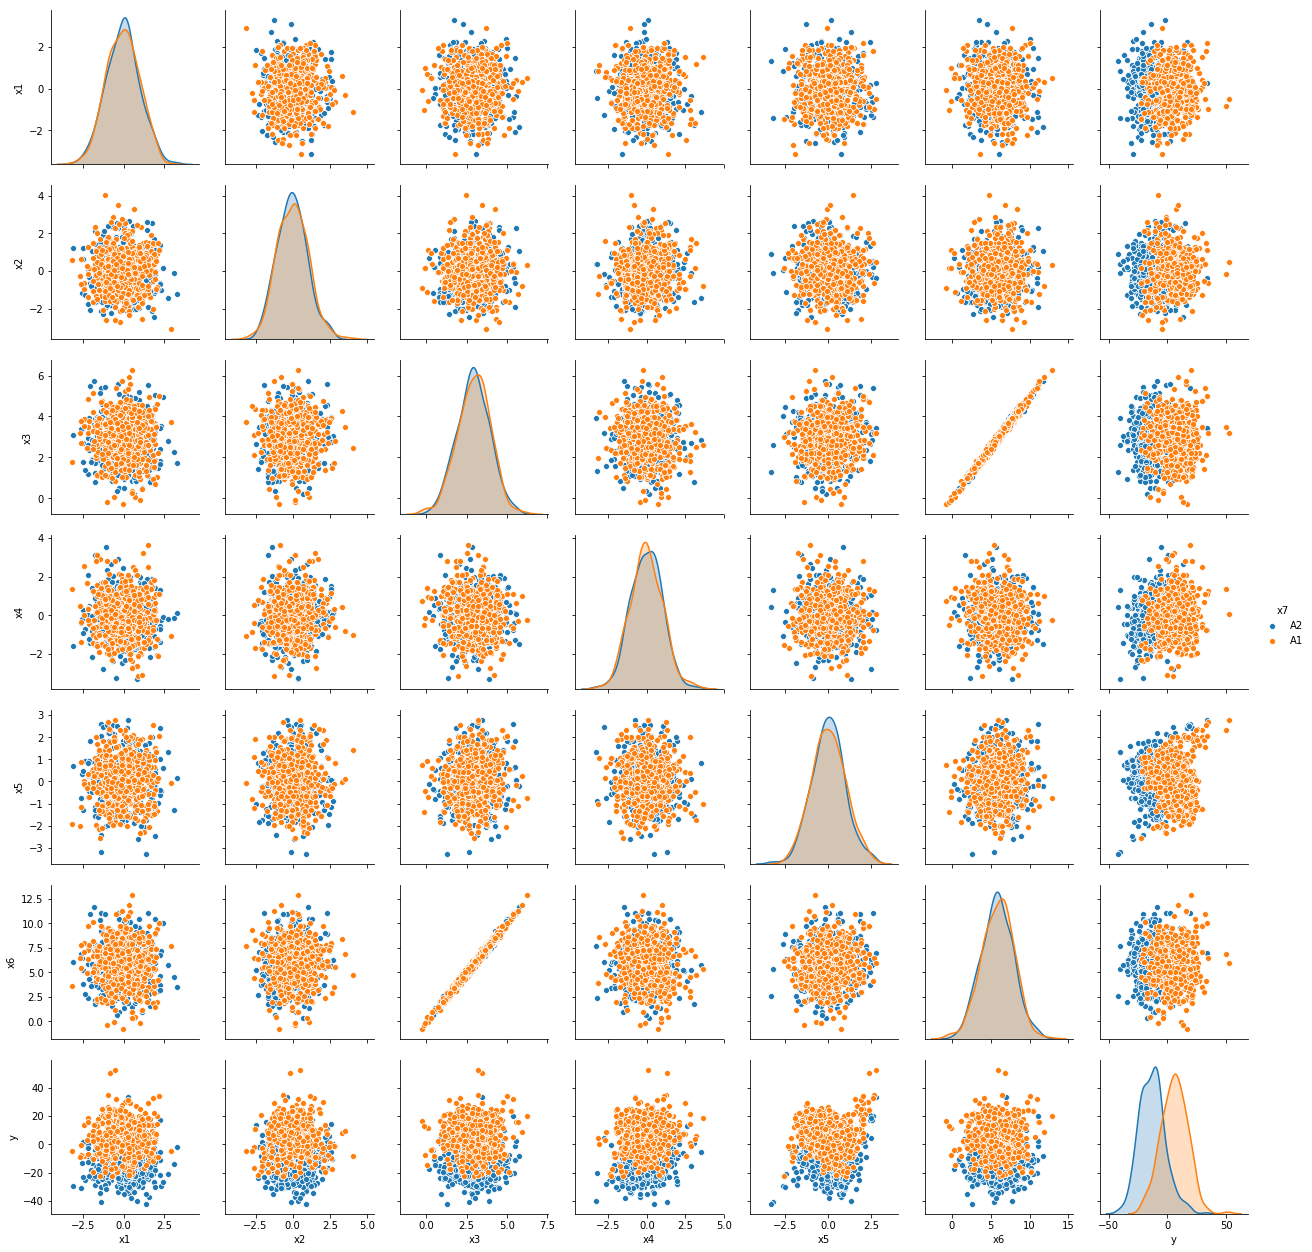

In [32]:
# x7
sb.pairplot(df9, hue='x7')

C:\Users\Kenneth\Miniconda3\envs\clearbrain_lastresort\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


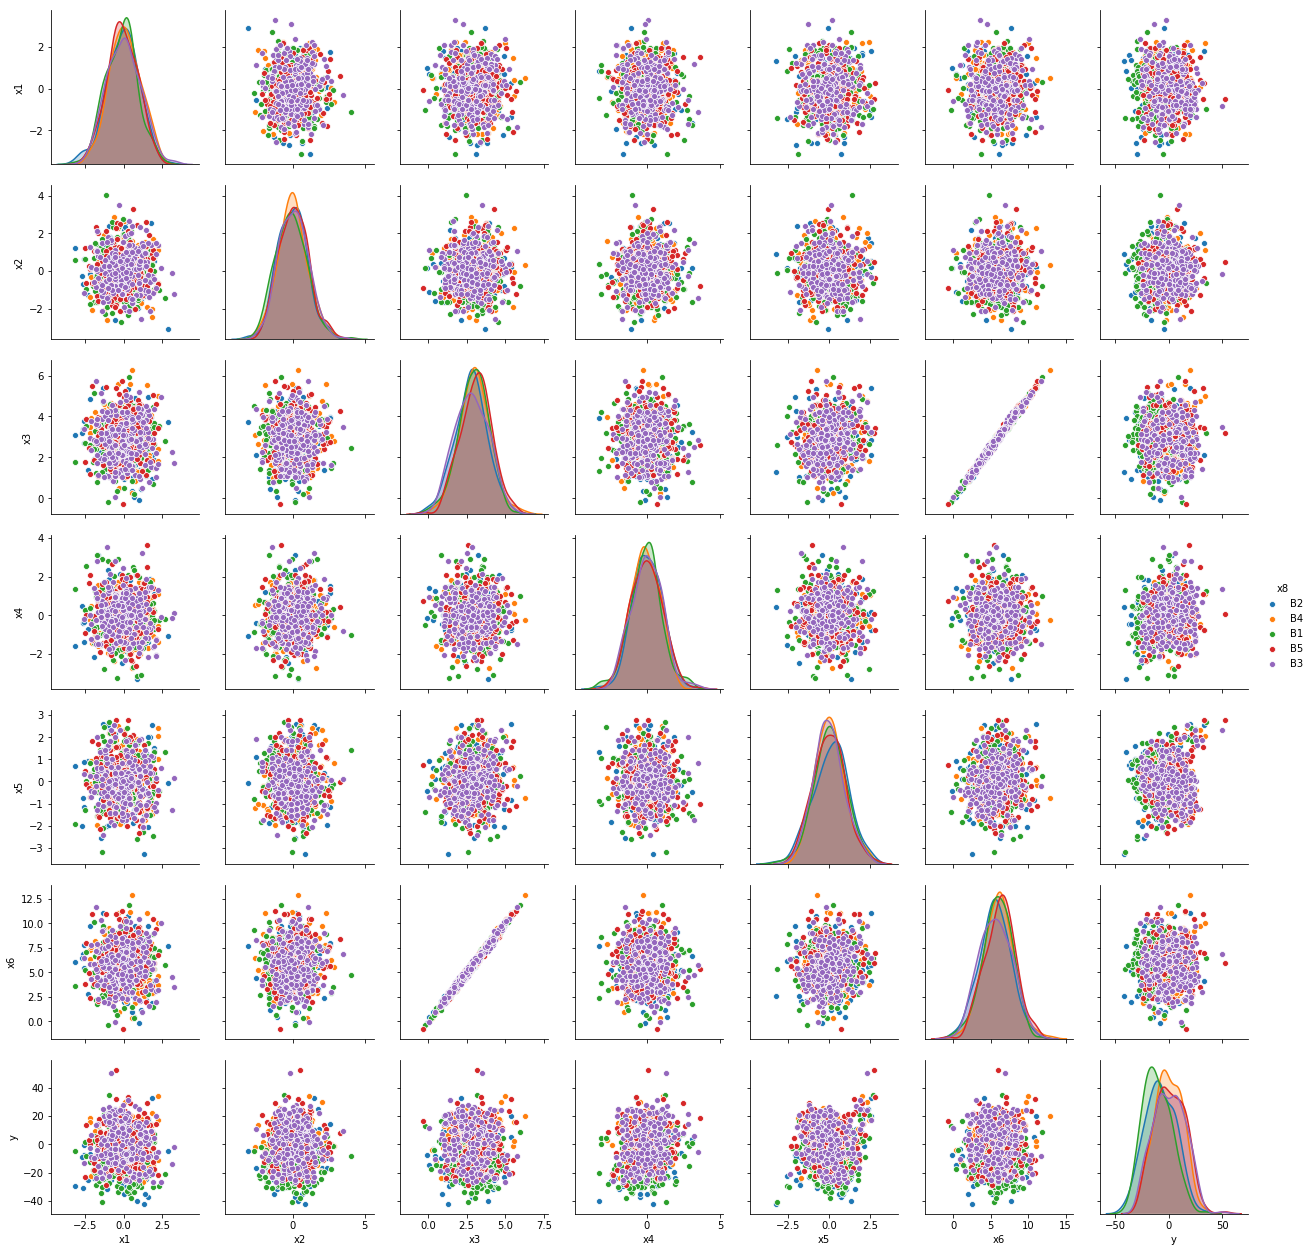

In [33]:
# x8
sb.pairplot(df9, hue='x8')

C:\Users\Kenneth\Miniconda3\envs\clearbrain_lastresort\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


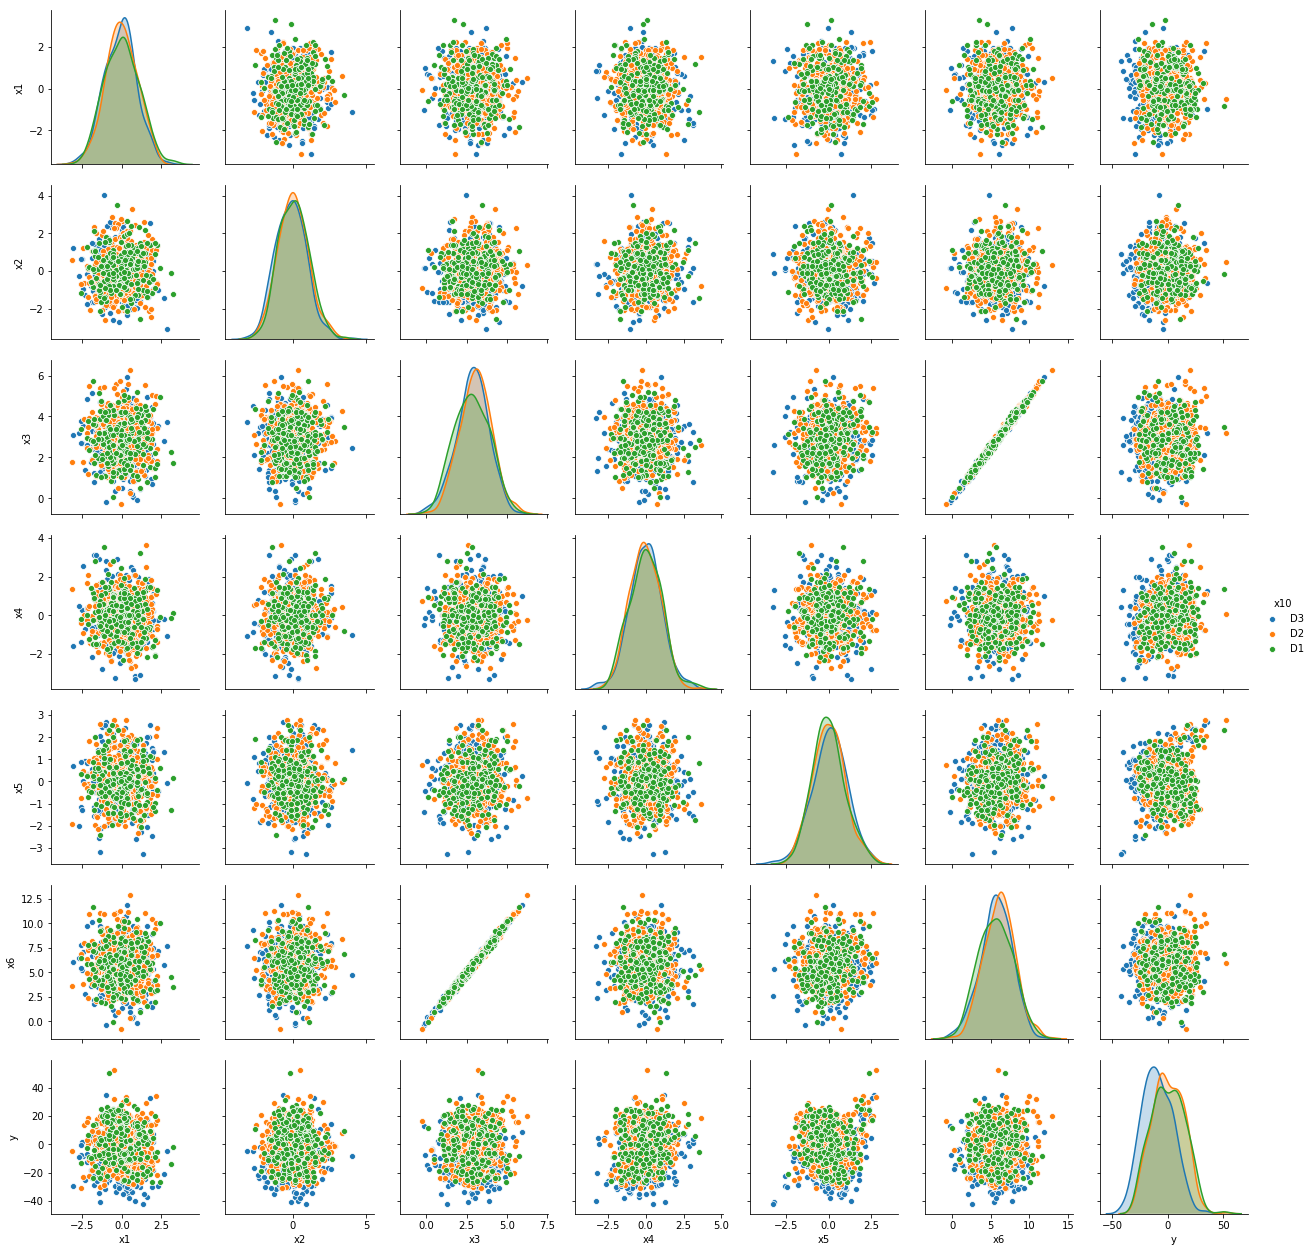

In [34]:
# x10
sb.pairplot(df9, hue='x10')

It hard to draw any definitive conclusions due to point layer, but the density plots in the bottom right suggest that x7 has difference distribution peaks.  Which is reinforced by the regression effects (A2 has ~-18 net effect relative to A1).

For each numeric variable, let's test interacting x7 with it and see if any produce a particularly better fit.  Though it's possible we're already estimating the effect.

For reference, previous R2 = 0.69

In [35]:
# x1 * x7
smf.ols(
    formula='''y ~ x1*x7 + np.power(x1, 2)*x7 + np.power(x1, 3)*x7 +
                   x2 + np.power(x2, 2) +
                   x4 +
                   x5 + np.power(x5, 2) + np.power(x5, 3) +
                   x6 + np.power(x6, 2) + np.power(x6, 3) + 
                   x8 + x10''',
    data=df9
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     98.77
Date:                Tue, 02 Jun 2020   Prob (F-statistic):          2.58e-230
Time:                        21:21:56   Log-Likelihood:                -3514.9
No. Observations:                1000   AIC:                             7076.
Df Residuals:                     977   BIC:                             7189.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -10.2456      4.052     -2.528      0.012     -18.197      -2.294
x7[T.A2]                   -18.1253      0.653    -27.763      0.000     -19.406     -16.844
x8[T.B2]                     1.3496      0.838      1.610      0.108      -0.295       2.994
x8[T.B3]                    18.3602      3.327      5.518      0.000      11.831      24.889
x8[T.B4]                    10.1019      1.918      5.266      0.000       6.337      13.867
x8[T.B5]                    10.4273      1.897      5.495      0.000       6.704      14.151
x10[T.D2]                    7.9286      2.829      2.802      0.005       2.377      13.480
x10[T.D3]                    8.7310      3.390      2.576      0.010       2.079      15.383
x1                          -1.6813      0.617     -2.727      0.007      -2.891      -0.471
x1:x7[T.A2]                 -0.4768      0.861     -0.554      0.580      -2.166       1.212
np.power(x1, 2)             -0.3964      0.296     -1.341      0.180      -0.976       0.184
np.power(x1, 2):x7[T.A2]    -0.2040      0.390     -0.523      0.601      -0.970       0.562
np.power(x1, 3)              0.5274      0.187      2.819      0.005       0.160       0.895
np.power(x1, 3):x7[T.A2]    -0.1457      0.240     -0.607      0.544      -0.617       0.325
x2                           0.0284      0.261      0.109      0.913      -0.484       0.541
np.power(x2, 2)             -0.3520      0.173     -2.031      0.043      -0.692      -0.012
x4                           2.1663      0.254      8.544      0.000       1.669       2.664
x5                          -5.6869      0.441    -12.897      0.000      -6.552      -4.822
np.power(x5, 2)              1.9715      0.196     10.056      0.000       1.587       2.356
np.power(x5, 3)              2.0543      0.122     16.875      0.000       1.815       2.293
x6                           0.9446      1.231      0.767      0.443      -1.472       3.361
np.power(x6, 2)             -0.2808      0.221     -1.269      0.205      -0.715       0.153
np.power(x6, 3)              0.0199      0.012      1.614      0.107      -0.004       0.044
==============================================================================
Omnibus:                       12.804   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                9.350
Skew:                           0.124   Prob(JB):                      0.00932
Kurtosis:                       2.596   Cond. No.                     9.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.63e+03. This might indicate that there are
strong m

In [36]:
# x2 * x7
smf.ols(
    formula='''y ~ x1 + np.power(x1, 2) + np.power(x1, 3) +
                   x2*x7 + np.power(x2, 2)*x7 +
                   x4 +
                   x5 + np.power(x5, 2) + np.power(x5, 3) +
                   x6 + np.power(x6, 2) + np.power(x6, 3) + 
                   x8 + x10''',
    data=df9
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     112.8
Date:                Tue, 02 Jun 2020   Prob (F-statistic):          6.91e-244
Time:                        21:21:56   Log-Likelihood:                -3485.1
No. Observations:                1000   AIC:                             7014.
Df Residuals:                     978   BIC:                             7122.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -6.5809      3.926     -1.676      0.094     -14.286       1.124
x7[T.A2]                   -21.1183      0.622    -33.948      0.000     -22.339     -19.898
x8[T.B2]                     1.5593      0.813      1.919      0.055      -0.036       3.154
x8[T.B3]                    16.0053      3.223      4.966      0.000       9.680      22.331
x8[T.B4]                     9.6506      1.857      5.197      0.000       6.006      13.295
x8[T.B5]                    10.0603      1.837      5.477      0.000       6.456      13.665
x10[T.D2]                    6.0771      2.746      2.213      0.027       0.688      11.466
x10[T.D3]                    6.4292      3.287      1.956      0.051      -0.020      12.879
x1                          -1.9912      0.412     -4.832      0.000      -2.800      -1.183
np.power(x1, 2)             -0.5706      0.184     -3.093      0.002      -0.933      -0.209
np.power(x1, 3)              0.4665      0.112      4.158      0.000       0.246       0.687
x2                           0.0404      0.344      0.117      0.907      -0.635       0.716
x2:x7[T.A2]                  0.0535      0.502      0.107      0.915      -0.931       1.038
np.power(x2, 2)             -1.3737      0.213     -6.438      0.000      -1.792      -0.955
np.power(x2, 2):x7[T.A2]     2.7269      0.346      7.882      0.000       2.048       3.406
x4                           2.1426      0.246      8.723      0.000       1.661       2.625
x5                          -5.5386      0.428    -12.941      0.000      -6.378      -4.699
np.power(x5, 2)              1.9704      0.190     10.369      0.000       1.597       2.343
np.power(x5, 3)              2.0576      0.118     17.427      0.000       1.826       2.289
x6                           0.8059      1.192      0.676      0.499      -1.534       3.146
np.power(x6, 2)             -0.2481      0.214     -1.159      0.247      -0.668       0.172
np.power(x6, 3)              0.0178      0.012      1.495      0.135      -0.006       0.041
==============================================================================
Omnibus:                       33.745   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.880
Skew:                           0.095   Prob(JB):                     0.000216
Kurtosis:                       2.392   Cond. No.                     9.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
# x4 * x7
smf.ols(
    formula='''y ~ x1 + np.power(x1, 2) + np.power(x1, 3) +
                   x2 + np.power(x2, 2) +
                   x4*x7 +
                   x5 + np.power(x5, 2) + np.power(x5, 3) +
                   x6 + np.power(x6, 2) + np.power(x6, 3) + 
                   x8 + x10''',
    data=df9
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     109.3
Date:                Tue, 02 Jun 2020   Prob (F-statistic):          7.07e-233
Time:                        21:21:56   Log-Likelihood:                -3513.7
No. Observations:                1000   AIC:                             7069.
Df Residuals:                     979   BIC:                             7172.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -9.5992      4.015     -2.391      0.017     -17.479      -1.719
x7[T.A2]          -18.2807      0.522    -34.997      0.000     -19.306     -17.256
x8[T.B2]            1.4427      0.835      1.727      0.085      -0.197       3.082
x8[T.B3]           18.1126      3.301      5.487      0.000      11.634      24.591
x8[T.B4]            9.9301      1.910      5.200      0.000       6.183      13.677
x8[T.B5]           10.2359      1.890      5.417      0.000       6.528      13.944
x10[T.D2]           7.8693      2.814      2.797      0.005       2.347      13.391
x10[T.D3]           8.5375      3.365      2.537      0.011       1.933      15.142
x1                 -1.8126      0.423     -4.286      0.000      -2.643      -0.983
np.power(x1, 2)    -0.5318      0.190     -2.804      0.005      -0.904      -0.160
np.power(x1, 3)     0.4023      0.115      3.493      0.000       0.176       0.628
x2                  0.0620      0.260      0.238      0.812      -0.449       0.573
np.power(x2, 2)    -0.3450      0.172     -2.003      0.045      -0.683      -0.007
x4                  1.5739      0.349      4.509      0.000       0.889       2.259
x4:x7[T.A2]         1.2226      0.507      2.410      0.016       0.227       2.218
x5                 -5.6757      0.440    -12.906      0.000      -6.539      -4.813
np.power(x5, 2)     1.9581      0.196     10.014      0.000       1.574       2.342
np.power(x5, 3)     2.0657      0.121     17.009      0.000       1.827       2.304
x6                  0.8488      1.226      0.692      0.489      -1.558       3.255
np.power(x6, 2)    -0.2768      0.220     -1.258      0.209      -0.709       0.155
np.power(x6, 3)     0.0202      0.012      1.645      0.100      -0.004       0.044
==============================================================================
Omnibus:                       12.088   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                8.623
Skew:                           0.104   Prob(JB):                       0.0134
Kurtosis:                       2.595   Cond. No.                     9.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
# x5 * x7
smf.ols(
    formula='''y ~ x1 + np.power(x1, 2) + np.power(x1, 3) +
                   x2 + np.power(x2, 2) +
                   x4 +
                   x5*x7 + np.power(x5, 2)*x7 + np.power(x5, 3)*x7 +
                   x6 + np.power(x6, 2) + np.power(x6, 3) + 
                   x8 + x10''',
    data=df9
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     98.56
Date:                Tue, 02 Jun 2020   Prob (F-statistic):          5.18e-230
Time:                        21:21:56   Log-Likelihood:                -3515.6
No. Observations:                1000   AIC:                             7077.
Df Residuals:                     977   BIC:                             7190.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -9.7020      4.033     -2.406      0.016     -17.616      -1.788
x7[T.A2]                   -18.3802      0.641    -28.654      0.000     -19.639     -17.121
x8[T.B2]                     1.3681      0.838      1.633      0.103      -0.276       3.012
x8[T.B3]                    18.0886      3.312      5.461      0.000      11.588      24.589
x8[T.B4]                     9.9946      1.915      5.218      0.000       6.236      13.753
x8[T.B5]                    10.3838      1.895      5.478      0.000       6.664      14.103
x10[T.D2]                    7.7425      2.823      2.743      0.006       2.203      13.282
x10[T.D3]                    8.4962      3.376      2.517      0.012       1.871      15.122
x1                          -1.8097      0.425     -4.257      0.000      -2.644      -0.975
np.power(x1, 2)             -0.5366      0.190     -2.818      0.005      -0.910      -0.163
np.power(x1, 3)              0.4028      0.116      3.476      0.001       0.175       0.630
x2                           0.0353      0.261      0.135      0.892      -0.477       0.548
np.power(x2, 2)             -0.3529      0.173     -2.038      0.042      -0.693      -0.013
x4                           2.1421      0.253      8.450      0.000       1.645       2.640
x5                          -6.0009      0.667     -8.996      0.000      -7.310      -4.692
x5:x7[T.A2]                  0.3579      0.904      0.396      0.692      -1.416       2.131
np.power(x5, 2)              1.8557      0.300      6.189      0.000       1.267       2.444
np.power(x5, 2):x7[T.A2]     0.1306      0.399      0.328      0.743      -0.651       0.913
np.power(x5, 3)              2.2662      0.212     10.708      0.000       1.851       2.682
np.power(x5, 3):x7[T.A2]    -0.2911      0.259     -1.122      0.262      -0.800       0.218
x6                           0.9095      1.232      0.738      0.461      -1.509       3.328
np.power(x6, 2)             -0.2781      0.221     -1.257      0.209      -0.712       0.156
np.power(x6, 3)              0.0199      0.012      1.616      0.106      -0.004       0.044
==============================================================================
Omnibus:                       13.315   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                9.438
Skew:                           0.115   Prob(JB):                      0.00893
Kurtosis:                       2.584   Cond. No.                     9.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.58e+03. This might indicate that there are
strong m

In [39]:
# x6 * x7
smf.ols(
    formula='''y ~ x1 + np.power(x1, 2) + np.power(x1, 3) +
                   x2 + np.power(x2, 2) +
                   x4 +
                   x5 + np.power(x5, 2) + np.power(x5, 3) +
                   x6*x7 + np.power(x6, 2)*x7 + np.power(x6, 3)*x7 + 
                   x8 + x10''',
    data=df9
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     98.41
Date:                Tue, 02 Jun 2020   Prob (F-statistic):          8.78e-230
Time:                        21:21:56   Log-Likelihood:                -3516.2
No. Observations:                1000   AIC:                             7078.
Df Residuals:                     977   BIC:                             7191.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -10.5682      4.250     -2.486      0.013     -18.909      -2.227
x7[T.A2]                   -15.1358      4.855     -3.117      0.002     -24.664      -5.608
x8[T.B2]                     1.4170      0.839      1.688      0.092      -0.230       3.064
x8[T.B3]                    18.0873      3.315      5.456      0.000      11.582      24.593
x8[T.B4]                     9.9564      1.917      5.193      0.000       6.194      13.719
x8[T.B5]                    10.3352      1.896      5.451      0.000       6.614      14.056
x10[T.D2]                    7.7222      2.824      2.734      0.006       2.180      13.264
x10[T.D3]                    8.4109      3.380      2.489      0.013       1.779      15.043
x1                          -1.8343      0.426     -4.306      0.000      -2.670      -0.998
np.power(x1, 2)             -0.5447      0.191     -2.847      0.005      -0.920      -0.169
np.power(x1, 3)              0.4131      0.116      3.569      0.000       0.186       0.640
x2                           0.0460      0.261      0.176      0.860      -0.467       0.559
np.power(x2, 2)             -0.3412      0.173     -1.973      0.049      -0.681      -0.002
x4                           2.1609      0.254      8.506      0.000       1.662       2.659
x5                          -5.6721      0.442    -12.831      0.000      -6.540      -4.805
np.power(x5, 2)              1.9733      0.196     10.056      0.000       1.588       2.358
np.power(x5, 3)              2.0598      0.122     16.902      0.000       1.821       2.299
x6                           1.2667      1.449      0.874      0.382      -1.578       4.111
x6:x7[T.A2]                 -1.5972      2.765     -0.578      0.564      -7.024       3.829
np.power(x6, 2)             -0.3370      0.264     -1.278      0.202      -0.855       0.181
np.power(x6, 2):x7[T.A2]     0.2703      0.494      0.547      0.584      -0.699       1.239
np.power(x6, 3)              0.0236      0.015      1.582      0.114      -0.006       0.053
np.power(x6, 3):x7[T.A2]    -0.0153      0.027     -0.561      0.575      -0.069       0.038
==============================================================================
Omnibus:                       13.168   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                9.449
Skew:                           0.119   Prob(JB):                      0.00888
Kurtosis:                       2.588   Cond. No.                     1.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong m

x2 and x4 are the only with significant interaction effects, and x2 is only one that seems to improved overall fit (R2 0.69 -> 0.71).  But only the squared terms were significant, and in opposite directions.  Let's visualize this to see if it makes sense.

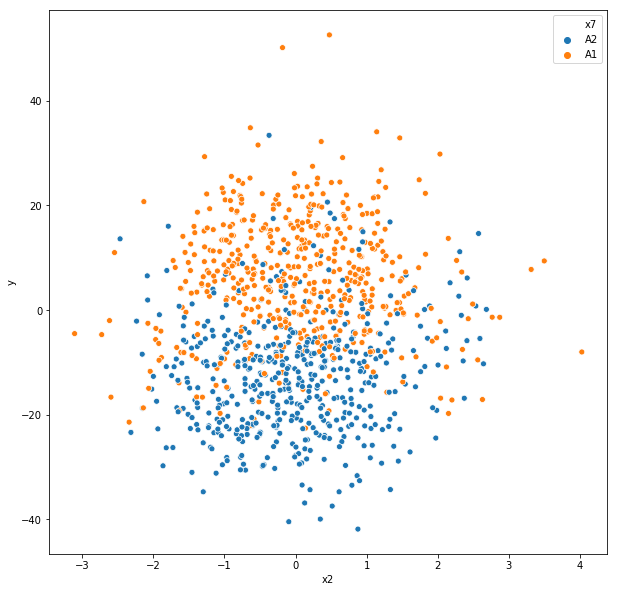

In [40]:
# Plot as is
plt.figure(figsize=(10, 10))
sb.scatterplot(data=df9, x='x2', y='y', hue='x7')

In [41]:
# Plot fit of a regression with just x2 and x7 for A1 and A2 separately
tmp_model = smf.ols(
    formula='''y ~ x2*x7 + np.power(x2, 2)*x7''',
    data=df9
).fit()

tmp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     155.2
Date:                Tue, 02 Jun 2020   Prob (F-statistic):          7.50e-122
Time:                        21:21:56   Log-Likelihood:                -3811.8
No. Observations:                1000   AIC:                             7636.
Df Residuals:                     994   BIC:                             7665.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    7.7097      0.583     13.219      0.000       6.565       8.854
x7[T.A2]                   -21.6590      0.850    -25.494      0.000     -23.326     -19.992
x2                           0.5896      0.470      1.256      0.210      -0.332       1.511
x2:x7[T.A2]                  0.3150      0.686      0.459      0.646      -1.031       1.661
np.power(x2, 2)             -1.4990      0.291     -5.156      0.000      -2.069      -0.929
np.power(x2, 2):x7[T.A2]     2.7450      0.471      5.829      0.000       1.821       3.669
==============================================================================
Omnibus:                       22.435   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.883
Skew:                           0.286   Prob(JB):                     1.45e-06
Kurtosis:                       3.564   Cond. No.                         6.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Similar effects to the overall regression, so reasonably estimating the effect.

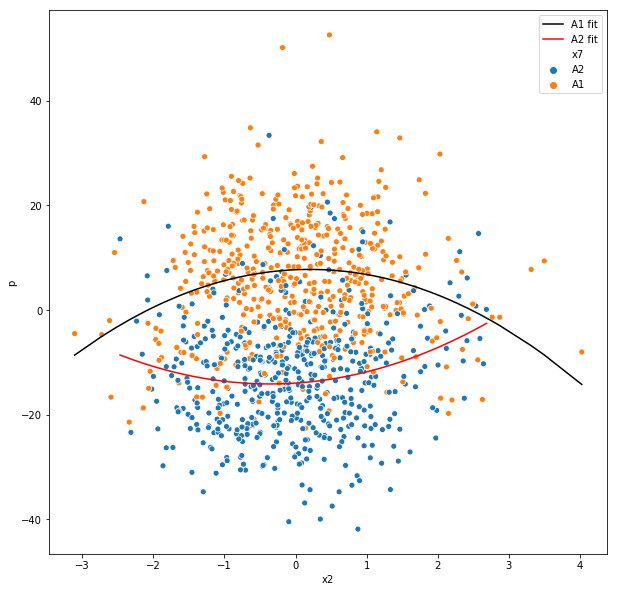

In [42]:
# Plot with fit lines
tmp_df = df9.assign(p = tmp_model.predict(df9))

plt.figure(figsize=(10, 10))
sb.scatterplot(data=tmp_df, x='x2', y='y', hue='x7')
sb.lineplot(data=tmp_df[tmp_df.x7 == 'A1'].sort_values('x2'), x='x2', y='p', color='black', label='A1 fit')
sb.lineplot(data=tmp_df[tmp_df.x7 == 'A2'].sort_values('x2'), x='x2', y='p', color='red', label='A2 fit')

In [43]:
# Delete these tmp objects
del tmp_model, tmp_df

It seems to be picking up on something, so let's leave it in.

Refit and summarize.

In [44]:
# x2 * x7
smf.ols(
    formula='''y ~ x1 + np.power(x1, 2) + np.power(x1, 3) +
                   x2*x7 + np.power(x2, 2)*x7 +
                   x4 +
                   x5 + np.power(x5, 2) + np.power(x5, 3) +
                   x6 + np.power(x6, 2) + np.power(x6, 3) + 
                   x8 + x10''',
    data=df9
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     112.8
Date:                Tue, 02 Jun 2020   Prob (F-statistic):          6.91e-244
Time:                        21:21:57   Log-Likelihood:                -3485.1
No. Observations:                1000   AIC:                             7014.
Df Residuals:                     978   BIC:                             7122.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -6.5809      3.926     -1.676      0.094     -14.286       1.124
x7[T.A2]                   -21.1183      0.622    -33.948      0.000     -22.339     -19.898
x8[T.B2]                     1.5593      0.813      1.919      0.055      -0.036       3.154
x8[T.B3]                    16.0053      3.223      4.966      0.000       9.680      22.331
x8[T.B4]                     9.6506      1.857      5.197      0.000       6.006      13.295
x8[T.B5]                    10.0603      1.837      5.477      0.000       6.456      13.665
x10[T.D2]                    6.0771      2.746      2.213      0.027       0.688      11.466
x10[T.D3]                    6.4292      3.287      1.956      0.051      -0.020      12.879
x1                          -1.9912      0.412     -4.832      0.000      -2.800      -1.183
np.power(x1, 2)             -0.5706      0.184     -3.093      0.002      -0.933      -0.209
np.power(x1, 3)              0.4665      0.112      4.158      0.000       0.246       0.687
x2                           0.0404      0.344      0.117      0.907      -0.635       0.716
x2:x7[T.A2]                  0.0535      0.502      0.107      0.915      -0.931       1.038
np.power(x2, 2)             -1.3737      0.213     -6.438      0.000      -1.792      -0.955
np.power(x2, 2):x7[T.A2]     2.7269      0.346      7.882      0.000       2.048       3.406
x4                           2.1426      0.246      8.723      0.000       1.661       2.625
x5                          -5.5386      0.428    -12.941      0.000      -6.378      -4.699
np.power(x5, 2)              1.9704      0.190     10.369      0.000       1.597       2.343
np.power(x5, 3)              2.0576      0.118     17.427      0.000       1.826       2.289
x6                           0.8059      1.192      0.676      0.499      -1.534       3.146
np.power(x6, 2)             -0.2481      0.214     -1.159      0.247      -0.668       0.172
np.power(x6, 3)              0.0178      0.012      1.495      0.135      -0.006       0.041
==============================================================================
Omnibus:                       33.745   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.880
Skew:                           0.095   Prob(JB):                     0.000216
Kurtosis:                       2.392   Cond. No.                     9.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

To simplify the model, let's drop the following because they haven't been showing up as significant at all:

- x2 linear terms
- x6 all terms

In [45]:
# x2 * x7
model9_nonlinear_x2x7 = smf.ols(
    formula='''y ~ x1 + np.power(x1, 2) + np.power(x1, 3) +
                   np.power(x2, 2)*x7 +
                   x4 +
                   x5 + np.power(x5, 2) + np.power(x5, 3) +
                   x8 + x10''',
    data=df9
).fit()

In [46]:
# Summarize
model9_nonlinear_x2x7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     147.8
Date:                Tue, 02 Jun 2020   Prob (F-statistic):          3.51e-248
Time:                        21:21:57   Log-Likelihood:                -3487.6
No. Observations:                1000   AIC:                             7009.
Df Residuals:                     983   BIC:                             7093.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -6.3912      3.306     -1.933      0.053     -12.878       0.096
x7[T.A2]                   -21.1300      0.619    -34.122      0.000     -22.345     -19.915
x8[T.B2]                     1.6383      0.810      2.022      0.043       0.048       3.229
x8[T.B3]                    15.9265      3.204      4.971      0.000       9.639      22.214
x8[T.B4]                     9.6609      1.854      5.210      0.000       6.022      13.300
x8[T.B5]                    10.0358      1.834      5.471      0.000       6.436      13.635
x10[T.D2]                    5.9478      2.731      2.178      0.030       0.589      11.307
x10[T.D3]                    6.2284      3.260      1.911      0.056      -0.169      12.626
x1                          -1.9960      0.411     -4.860      0.000      -2.802      -1.190
np.power(x1, 2)             -0.5578      0.184     -3.032      0.002      -0.919      -0.197
np.power(x1, 3)              0.4702      0.112      4.202      0.000       0.251       0.690
np.power(x2, 2)             -1.3932      0.210     -6.644      0.000      -1.805      -0.982
np.power(x2, 2):x7[T.A2]     2.7553      0.342      8.051      0.000       2.084       3.427
x4                           2.1533      0.245      8.793      0.000       1.673       2.634
x5                          -5.5705      0.427    -13.045      0.000      -6.408      -4.733
np.power(x5, 2)              1.9743      0.190     10.417      0.000       1.602       2.346
np.power(x5, 3)              2.0680      0.118     17.559      0.000       1.837       2.299
==============================================================================
Omnibus:                       35.908   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.497
Skew:                           0.092   Prob(JB):                     0.000159
Kurtosis:                       2.379   Cond. No.                         94.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Those multi-collinearity messages dropped away too!

### Now, how about x9!

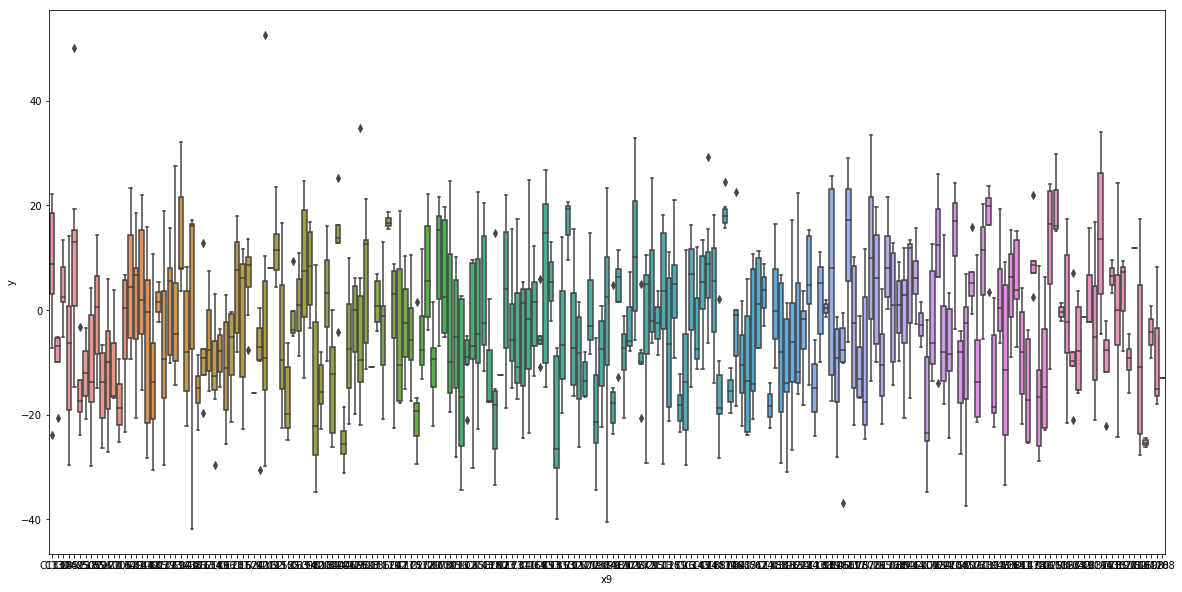

In [47]:
# x9
plt.figure(figsize=(20, 10))
sb.boxplot(data=df9, x='x9', y='y')

In [48]:
# Value counts for x9
df9['x9'].value_counts()

C171    12
C21     11
C43     10
C94     10
C45      9
        ..
C182     1
C92      1
C108     1
C74      1
C162     1
Name: x9, Length: 199, dtype: int64

In [49]:
# Value counts for x9
df9['x9'].value_counts().value_counts().sort_index()

1      7
2     15
3     26
4     38
5     30
6     37
7     27
8      6
9      9
10     2
11     1
12     1
Name: x9, dtype: int64

x9 presents a few interesting problems:

- A lot of unique values relative to the total size of the data, 200:1000 or 1:5 unique value
- Some have as few observations as possible (i.e. 1)
- Even the value with the most values at 12 would be hard to make sure we could generalize

However, the boxplot above suggests that there are differences in distributions.  Glossing over the whole train/test/holdout procedure we should use (which presents even more potential problems, e.g. what if there is a new value that shows up at scoring time?!), here a few ways we could deal with it:

- Include as is
    - Pros: No work up front
    - Cons: Ignores all the problems above, might be very hard to interpret or generalize
- Group together all low count groups
    - Pros: Does some work to help generalize the model and trust that we can interpret effects
    - Cons: Might be grouping together values that result in very different
- Encode the factor as a number that represents its a relationship with our target (e.g simple average by group, weight of information, leave one out)
    - Pros: Creates a reasonably interpretable variable for modelling
    - Cons: Can simplify fixed effects and be hard to trust that it extends to other values

Note that all three of these are hard to do well without train/test/holdout, otherwise we will almost certainly overfit out model on the training data.

Since I said don't worry about train/test/holdout, let's just test the first one.

In [50]:
# x9 as is
smf.ols(
    formula='''y ~ x1 + np.power(x1, 2) + np.power(x1, 3) +
                   np.power(x2, 2)*x7 +
                   x4 +
                   x5 + np.power(x5, 2) + np.power(x5, 3) +
                   x8 + x9 + x10''',
    data=df9
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     78.14
Date:                Tue, 02 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:22:01   Log-Likelihood:                -2547.9
No. Observations:                1000   AIC:                             5526.
Df Residuals:                     785   BIC:                             6581.
Df Model:                         214                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -4.6428      2.996     -1.550      0.122     -10.524       1.239
x7[T.A2]                   -21.4909      0.304    -70.698      0.000     -22.088     -20.894
x8[T.B2]                     0.4499      0.403      1.117      0.264      -0.341       1.241
x8[T.B3]                    10.8432      1.621      6.688      0.000       7.660      14.026
x8[T.B4]                     9.6924      0.900     10.769      0.000       7.926      11.459
x8[T.B5]                     9.9405      0.889     11.181      0.000       8.195      11.686
x9[T.C1]                     0.2010      2.871      0.070      0.944      -5.434       5.836
x9[T.C10]                   -7.6323      2.944     -2.593      0.010     -13.411      -1.854
x9[T.C100]                  -5.5084      2.822     -1.952      0.051     -11.048       0.031
x9[T.C101]                  -2.8780      3.043     -0.946      0.345      -8.851       3.095
x9[T.C102]                   3.2802      2.935      1.118      0.264      -2.481       9.042
x9[T.C103]                   9.8083      2.967      3.305      0.001       3.984      15.633
x9[T.C104]                  16.8253      3.040      5.534      0.000      10.857      22.793
x9[T.C105]                  -8.3623      3.203     -2.611      0.009     -14.649      -2.075
x9[T.C106]                  -8.3672      3.510     -2.384      0.017     -15.257      -1.478
x9[T.C107]                   3.8558      2.821      1.367      0.172      -1.681       9.393
x9[T.C108]                  10.8200      4.306      2.513      0.012       2.367      19.273
x9[T.C109]                  13.2077      3.213      4.111      0.000       6.901      19.515
x9[T.C11]                   -1.8325      2.827     -0.648      0.517      -7.381       3.716
x9[T.C110]                  -7.1952      3.525     -2.041      0.042     -14.114      -0.276
x9[T.C111]                   0.0311      2.818      0.011      0.991      -5.501       5.564
x9[T.C112]                   5.7950      2.813      2.060      0.040       0.273      11.317
x9[T.C113]                   8.8727      3.216      2.759      0.006       2.561      15.185
x9[T.C114]                  14.0087      2.871      4.879      0.000       8.372      19.645
x9[T.C115]                  -5.6023      2.977     -1.882      0.060     -11.446       0.242
x9[T.C116]                   3.3095      3.512      0.942      0.346      -3.584      10.203
x9[T.C117]                   3.1295      3.043      1.028      0.304      -2.844       9.103
x9[T.C118]                  10.1089      2.746      3.681      0.000       4.719      15.499
x9[T.C119]                  14.1121      3.200      4.410      0.000       7.830      20.394
x9[T.C12]                    3.6584      2.887      1.267      0.206      -2.010       9.327
x9[T.C120]    

%md
That very high R2 value suggests that we are massively overfitting.  tl;dr I'm not convinced having 12 or fewer observations (and most often 4-5) of a category is enough to expect the data to generalize to other data (which is usually the whole reason we're building a model).

For funsies, let's try doing a very basic 70/30 train/test and see how it goes.

In [ ]:
# Train/test split
x9_train, x9_test = train_test_split(df9, train_size=0.70, test_size=0.30, random_state=666)

# Fit train
x9_model = smf.ols(
    formula='''y ~ x1 + np.power(x1, 2) + np.power(x1, 3) +
                   np.power(x2, 2)*x7 +
                   x4 +
                   x5 + np.power(x5, 2) + np.power(x5, 3) +
                   x8 + x9 + x10''',
    data=x9_train
).fit()

# Predict test
x9_test['p_x9_model'] = x9_model.predict(x9_test)

In [ ]:
# Aha, I bet C162 doesn't exist in the training data.  Let's confirm.
x9_train[x9_train.x9 == "C162"]

Yep, no rows.  Which is another risk we run into with low exposure categories.  There are ways to deal with this, but we'll stop because Derek made this variable a bit ridiculous to deal with in this size of a data set.

More generally, I'd recommend taking a look through some of these pages/repos for background and ideas and some code:

- Decent survey of some common (and some new ones for Derek) techniques: https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02
- Leave one out (LOO) https://github.com/welfare520/leave-one-out-encoder/tree/master/loo_encoder